# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Сбор и анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Работы, присланные иным способом, не принимаются.
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате ipynb.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 50 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 80 баллов
* Задача 3 &mdash; 100 баллов

---

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

---
### Задача 3.

В данной задаче вам предстоит распарсить сайт, который вы выберите.

**1.** Каждая ссылка (URL) в интернете состоит из нескольких компонент:

* схема, *например, `http` или `https`*,
* хост, *наример, `en.wikipedia.org`*
* путь, по которому находится информация,
* параметры,
* якорь &mdash; указание фрагмента страницы.

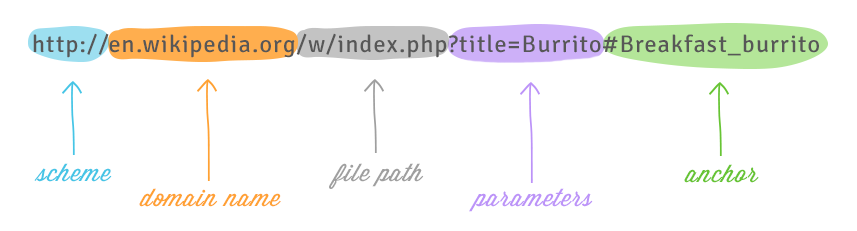

Одна и та же ссылка может иметь несколько форм и вести на ту же самую страницу. Во время обхода сайта это надо учитывать и сохранять один уникальный урл для каждой страницы. Процедура, приводящая урл к каноничному виду, называется нормализацией.
Процедуры, которые применяются к урлу для нормализации, описаны, например, на <a target="_blank" href="https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_URL">Википедии</a>.

Установите пакет `url_normalize`, в котором есть готовая функция для нормализации.

Прочитайте, как именно функция `url_normalize` меняет ссылку, и приведите примеры $4$ урлов, которые нормализуются к одному и тому же. Примеры должны демонстрировать различные этапы процедуры нормализации. Одним из этих примеров может быть сам нормализованный урл.

In [23]:
import sys
!{sys.executable} -m pip install url_normalize

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [24]:
from url_normalize import url_normalize

In [25]:
...

Ellipsis

_____________
Изучите код, в котором скачиваются страницы сайта `simple.wikipedia.org` с <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/data_parsing.html">занятия про парсинг данных</a> и **скопируйте его в решение данной задачи**. Код, реализующий обход в ширину с фильтрацией и нормализацией урлов, приведён в виде функции.

In [29]:
import json
import requests

sns.set(font_scale=1.3, palette="Set2", style="whitegrid")

In [30]:
from urllib.parse import urlparse, urldefrag, urljoin
from urllib.request import urlopen
from bs4 import BeautifulSoup
from queue import Queue
import time

In [31]:
def download_from_the_internet(url):
    '''Скачивает сраницу с интернета

    Параметры:
        url (str) - ссылка на страницу для скачивания

    Возвращает:
        str - html-страница в виде строки, None в случае неудачи
    '''
    try:
        return urlopen(url).read().decode('utf-8')
    except KeyboardInterrupt:
        raise
    except:
        return None

    
def extract_links_from_html(url, html):
    '''Парсит ссылки на странице

    Принимает:
        url (str) - исходный урл страницы
        html (str) - содержание html-страницы

    Возвращает:
        list - список ссылок, находящихся на странице
    '''
    parser = BeautifulSoup(html)
    # Формируем ссылки на те страницы, на которые ссылается документ
    return [urljoin(url, link.get('href')) for link in parser.findAll('a')]


def extract_text_info_from_html(html):
    '''Парсит текстовую информацию на странице

    Принимает:
         html (str) - содержание html-страницы

    Возвращает:
        dict - текстовая часть страницы по ключу text,
               название по ключу title
    '''
    soup = BeautifulSoup(html, features="html.parser")
    for script in soup(["script", "style"]):
        script.extract()
    
    # Объединяем строки текста
    text = soup.get_text()
    lines = (line.strip() for line in text.splitlines())
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    text = '\n'.join(chunk for chunk in chunks if chunk)

    # Находим название на странице
    title = soup.find('title').string
    
    return {'text': text, 'title': title}
    

def is_wiki_article(url):
    '''Проверяет, является ли ссылка страницей на simple.wikipedia'''
    if 'simple.wikipedia' not in url:
        return False
    
    prohibited = ['Category', 'Special', 'Wikipedia',
                  'php', 'Help']
    
    # Проверяем, есть ли запрещённые строки в ссылке
    for token in prohibited:
        if token in url:
            return False
        
    return True

Код обхода в ширину:

In [34]:
def filtration_function(url):
    if 'en.wikipedia.org' not in url:
        return False
    if '#' in url:
        return False
    
    if 'football' in url.lower():
        return True
    return False

In [35]:
def load_web_pages(seed, max_downloads, filtration_function, start_time):
    '''Обходит web-страницы в ширину и загружает информацию о них.
    
    Принимает:
        seed (str) -- страница, с которой начинать обход.
        max_downloads (int) -- максимальное число загруженных страниц.
        filtration_function (str -> bool) -- функция, указывающая, 
            стоит ли загружать страницу. Пример: is_wiki_article.
            
    Возвращает:
        pages_json (list) - список словарей с информацией о страницах.
    '''
    
    # Создаём список со страницами
    pages_json = []
    
    # Создаём очередь для обхода в ширину
    q = Queue()
    q.put(seed)

    already_visited = set()
    n_downloads = 0
    time_start = time.time()

    while not q.empty():
        print("--- %s seconds ---" % (time.time() - start_time))
        print(len(already_visited))
        
        # Нормализуем урл
        main_url = url_normalize(q.get())
        print(main_url)
        if main_url.lower() in already_visited:
            continue
        already_visited.add(main_url.lower())
        html = download_from_the_internet(main_url)
        if html is None:
            continue
        # Извлекаем ссылки из страницы
        children_links = extract_links_from_html(main_url, html)
        time.sleep(1)

        # Извлекаем текст страницы
        text_info = extract_text_info_from_html(html) 

        # Добавляем запись в таблицу
        text_info['url'] = main_url
        pages_json.append(text_info)

        n_downloads += 1
        if n_downloads > max_downloads:
            break

        # Добавляем ещё не посещённые ссылки в очередь
        for child in children_links:
            if url_normalize(child) not in already_visited \
            and filtration_function(child):
                q.put(child)
                
    return pages_json

**2.** Выберите достаточно крупный сайт, который вам интересен, а также некоторую категорию страниц в нём. Поймите, с какой страницы сайта надо начать обход, чтобы обходить сайты данной категории.

*Пример: ищем статьи про Data Science на Википедии, начинаем со статьи Data Dcience*.

**Укажите, что выбрали:** Ищем статьи про Football на Википедии, начиная со страницы https://en.wikipedia.org/wiki/Sport

Придумайте критерий, который по тексту из HTML-страницы будет определять, находится ли страница в определённой вами категории.

*Пример: статья на Википедии про Data Science, если в ней есть слово "data" или термины из статистики, теории вероятностей и анализа данных*.

**Опишите критерий:** статья на Вики про Football, если в ней есть слово *russia*

Начав с выбранной страницы, скачайте не менее $500$ страниц сайта. В качестве функции фильтрации возьмите функцию, которая отделяет страницы с выбранного сайта от других.

In [36]:
start_time = time.time()
load_data = load_web_pages('https://en.wikipedia.org/wiki/Sport', 500, filtration_function, start_time)

--- 0.002794981002807617 seconds ---
0
https://en.wikipedia.org/wiki/Sport
--- 2.3619720935821533 seconds ---
1
https://en.wikipedia.org/wiki/Association_football
--- 4.910004138946533 seconds ---
2
https://en.wikipedia.org/wiki/Association_football
--- 4.910359144210815 seconds ---
2
https://en.wikipedia.org/wiki/Association_football
--- 4.9107091426849365 seconds ---
2
https://en.wikipedia.org/wiki/Arena_football
--- 6.68940806388855 seconds ---
3
https://en.wikipedia.org/wiki/National_Football_League
--- 9.31597900390625 seconds ---
4
https://en.wikipedia.org/wiki/Association_football
--- 9.316467046737671 seconds ---
4
https://en.wikipedia.org/wiki/Gaelic_football
--- 11.308480024337769 seconds ---
5
https://en.wikipedia.org/wiki/Association_football
--- 11.308770895004272 seconds ---
5
https://en.wikipedia.org/wiki/Football_War
--- 13.07365107536316 seconds ---
6
https://en.wikipedia.org/wiki/Association_football
--- 13.073954820632935 seconds ---
6
https://en.wikipedia.org/wiki/M

--- 164.0359718799591 seconds ---
59
https://en.wikipedia.org/wiki/Kit_(association_football)
--- 165.7804970741272 seconds ---
60
https://en.wikipedia.org/wiki/Referee_(association_football)
--- 165.78072786331177 seconds ---
60
https://en.wikipedia.org/wiki/Substitute_(association_football)
--- 165.7808132171631 seconds ---
60
https://en.wikipedia.org/wiki/Goalkeeper_(football)
--- 167.58976793289185 seconds ---
61
https://en.wikipedia.org/wiki/Association_football_positions
--- 167.59006190299988 seconds ---
61
https://en.wikipedia.org/wiki/Kit_(association_football)
--- 167.5904939174652 seconds ---
61
https://en.wikipedia.org/wiki/Association_football_headgear
--- 168.92795705795288 seconds ---
62
https://en.wikipedia.org/wiki/Referee_(association_football)
--- 168.92850399017334 seconds ---
62
https://en.wikipedia.org/wiki/Assistant_referee_(association_football)
--- 170.47600388526917 seconds ---
63
https://en.wikipedia.org/wiki/Ball_(association_football)
--- 170.47835087776184

--- 265.7044141292572 seconds ---
106
https://en.wikipedia.org/wiki/Paralympic_association_football
--- 267.59222888946533 seconds ---
107
https://en.wikipedia.org/wiki/Powerchair_Football
--- 269.2459089756012 seconds ---
108
https://en.wikipedia.org/wiki/Seven-a-side_football
--- 270.70228695869446 seconds ---
109
https://en.wikipedia.org/wiki/Swamp_football
--- 329.74192118644714 seconds ---
110
https://en.wikipedia.org/wiki/Street_football
--- 331.6313600540161 seconds ---
111
https://en.wikipedia.org/wiki/Three_sided_football
--- 333.39664793014526 seconds ---
112
https://en.wikipedia.org/wiki/Walking_football
--- 334.9672679901123 seconds ---
113
https://en.wikipedia.org/wiki/Association_football_positions
--- 334.9675431251526 seconds ---
113
https://en.wikipedia.org/wiki/Goalkeeper_(association_football)
--- 334.96768498420715 seconds ---
113
https://en.wikipedia.org/wiki/Defender_(association_football)
--- 334.9678008556366 seconds ---
113
https://en.wikipedia.org/wiki/Forward

--- 433.08071780204773 seconds ---
163
https://en.wikipedia.org/wiki/Football_at_the_Jeux_de_la_Francophonie
--- 434.49796199798584 seconds ---
164
https://en.wikipedia.org/wiki/Football_at_the_Indian_Ocean_Island_Games
--- 435.96902108192444 seconds ---
165
https://en.wikipedia.org/wiki/Football_at_the_Islamic_Solidarity_Games
--- 437.40024995803833 seconds ---
166
https://en.wikipedia.org/wiki/Football_at_the_Lusofonia_Games
--- 438.8244161605835 seconds ---
167
https://en.wikipedia.org/wiki/Football_at_the_Mediterranean_Games
--- 440.5184941291809 seconds ---
168
https://en.wikipedia.org/wiki/Football_at_the_Pan_American_Games
--- 442.36725211143494 seconds ---
169
https://en.wikipedia.org/wiki/Football_at_the_Pan_Arab_Games
--- 444.0160028934479 seconds ---
170
https://en.wikipedia.org/wiki/Football_at_the_Pacific_Games
--- 445.7702658176422 seconds ---
171
https://en.wikipedia.org/wiki/Football_at_the_South_Asian_Games
--- 447.29256415367126 seconds ---
172
https://en.wikipedia.or

--- 481.9357030391693 seconds ---
192
https://en.wikipedia.org/wiki/Association_football_positions
--- 481.93597078323364 seconds ---
192
https://en.wikipedia.org/wiki/Association_football_tactics
--- 481.93609499931335 seconds ---
192
https://en.wikipedia.org/w/index.php?action=edit&redlink=1&title=Association_football_skills
--- 482.94395184516907 seconds ---
193
https://en.wikipedia.org/wiki/Variants_of_association_football
--- 484.30929589271545 seconds ---
194
https://en.wikipedia.org/wiki/Comparison_of_association_football_and_futsal
--- 484.3095917701721 seconds ---
194
https://en.wikipedia.org/wiki/Anti-football
--- 484.3097240924835 seconds ---
194
https://en.wikipedia.org/wiki/Total_Football
--- 484.30988097190857 seconds ---
194
https://en.wikipedia.org/wiki/Curl_(association_football)
--- 485.7449197769165 seconds ---
195
https://en.wikipedia.org/wiki/Flip_flap_(association_football)
--- 487.1096680164337 seconds ---
196
https://en.wikipedia.org/wiki/Nutmeg_(association_foo

--- 662.9612710475922 seconds ---
262
https://en.wikipedia.org/wiki/1912_in_association_football
--- 664.363930940628 seconds ---
263
https://en.wikipedia.org/wiki/1913_in_association_football
--- 665.7700879573822 seconds ---
264
https://en.wikipedia.org/wiki/1914_in_association_football
--- 667.244616985321 seconds ---
265
https://en.wikipedia.org/wiki/1915_in_association_football
--- 669.0352520942688 seconds ---
266
https://en.wikipedia.org/wiki/1916_in_association_football
--- 670.4653451442719 seconds ---
267
https://en.wikipedia.org/wiki/1917_in_association_football
--- 671.8818361759186 seconds ---
268
https://en.wikipedia.org/wiki/1918_in_association_football
--- 673.3034288883209 seconds ---
269
https://en.wikipedia.org/wiki/1919_in_association_football
--- 674.7196171283722 seconds ---
270
https://en.wikipedia.org/wiki/1920_in_association_football
--- 676.1658289432526 seconds ---
271
https://en.wikipedia.org/wiki/1921_in_association_football
--- 677.5935020446777 seconds --

--- 789.7138278484344 seconds ---
347
https://en.wikipedia.org/wiki/1997_in_association_football
--- 791.228502035141 seconds ---
348
https://en.wikipedia.org/wiki/1998_in_association_football
--- 792.7022759914398 seconds ---
349
https://en.wikipedia.org/wiki/1999_in_association_football
--- 794.20893907547 seconds ---
350
https://en.wikipedia.org/wiki/2000_in_association_football
--- 795.7245080471039 seconds ---
351
https://en.wikipedia.org/wiki/2001_in_association_football
--- 797.1891448497772 seconds ---
352
https://en.wikipedia.org/wiki/2002_in_association_football
--- 798.6603779792786 seconds ---
353
https://en.wikipedia.org/wiki/2003_in_association_football
--- 800.1622741222382 seconds ---
354
https://en.wikipedia.org/wiki/2004_in_association_football
--- 801.7361061573029 seconds ---
355
https://en.wikipedia.org/wiki/2005_in_association_football
--- 803.4731409549713 seconds ---
356
https://en.wikipedia.org/wiki/2006_in_association_football
--- 805.0418241024017 seconds ---

--- 1022.7067711353302 seconds ---
410
https://en.wikipedia.org/w/index.php?printable=yes&title=Association_football
--- 1026.1489260196686 seconds ---
411
https://en.wikipedia.org/wiki/Arena_football
--- 1026.1513459682465 seconds ---
411
https://en.wikipedia.org/w/index.php?redirect=no&title=Arena_football
--- 1027.8589887619019 seconds ---
412
https://en.wikipedia.org/wiki/Arena_Football_League
--- 1030.2429678440094 seconds ---
413
https://en.wikipedia.org/wiki/Indoor_Football_League
--- 1032.6464169025421 seconds ---
414
https://en.wikipedia.org/wiki/Gridiron_football
--- 1032.6488049030304 seconds ---
414
https://en.wikipedia.org/wiki/Gridiron_football
--- 1032.6490058898926 seconds ---
414
https://en.wikipedia.org/wiki/American_football
--- 1032.6491951942444 seconds ---
414
https://en.wikipedia.org/wiki/Canadian_football
--- 1032.6493468284607 seconds ---
414
https://en.wikipedia.org/w/index.php?action=edit&section=1&title=Indoor_American_football
--- 1034.4975519180298 seconds

--- 1117.734601020813 seconds ---
462
https://en.wikipedia.org/wiki/Supreme_Indoor_Football
--- 1117.734869003296 seconds ---
462
https://en.wikipedia.org/wiki/Ultimate_Indoor_Football_League
--- 1119.1990060806274 seconds ---
463
https://en.wikipedia.org/wiki/United_Indoor_Football
--- 1119.1992819309235 seconds ---
463
https://en.wikipedia.org/wiki/World_Indoor_Football_League
--- 1119.1993968486786 seconds ---
463
https://en.wikipedia.org/wiki/World_Indoor_Football_League_(2007)
--- 1120.5958240032196 seconds ---
464
https://en.wikipedia.org/wiki/X-League_Indoor_Football
--- 1122.0073130130768 seconds ---
465
https://en.wikipedia.org/w/index.php?action=edit&section=10&title=Indoor_American_football
--- 1123.80281996727 seconds ---
466
https://en.wikipedia.org/w/index.php?action=edit&section=11&title=Indoor_American_football
--- 1125.6599261760712 seconds ---
467
https://en.wikipedia.org/wiki/Template:Professional_gridiron_football_leagues_in_North_America
--- 1127.0138940811157 seco

Cделайте `pandas`-таблицу со следующей информацией:

* количество слов в тексте статьи;
* принадлежит ли страница выбранной категории.

Для последнего пункта можете воспользоваться функцией поиска слов по заданным префиксам, рассмотренной на <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/data_parsing.html">занятии</a>.

In [37]:
wiki_df = pd.DataFrame(load_data)
wiki_df

,text,title,url
0,"Sport - Wikipedia\nSport\nFrom Wikipedia, the ...",Sport - Wikipedia,https://en.wikipedia.org/wiki/Sport
1,Association football - Wikipedia\nAssociation ...,Association football - Wikipedia,https://en.wikipedia.org/wiki/Association_foot...
2,Indoor American football - Wikipedia\nIndoor A...,Indoor American football - Wikipedia,https://en.wikipedia.org/wiki/Arena_football
3,National Football League - Wikipedia\nNational...,National Football League - Wikipedia,https://en.wikipedia.org/wiki/National_Footbal...
4,Gaelic football - Wikipedia\nGaelic football\n...,Gaelic football - Wikipedia,https://en.wikipedia.org/wiki/Gaelic_football
...,...,...,...
496,Professional Football League of America - Wiki...,Professional Football League of America - Wiki...,https://en.wikipedia.org/wiki/Professional_Foo...
497,Texas Football League - Wikipedia\nTexas Footb...,Texas Football League - Wikipedia,https://en.wikipedia.org/wiki/Texas_Football_L...
498,Seaboard Football League - Wikipedia\nSeaboard...,Seaboard Football League - Wikipedia,https://en.wikipedia.org/wiki/Seaboard_Footbal...
499,American Football Association (1977–1983) - Wi...,American Football Association (1977–1983) - Wi...,https://en.wikipedia.org/wiki/American_Footbal...


In [38]:
import re

In [39]:
def count_words(x):
    x['count words'] = len(re.findall(r'\w+', x['text']))
    return x

In [40]:
wiki_df['count words'] = 0
wiki_df = wiki_df.apply(lambda x : count_words(x), axis=1)
wiki_df

,text,title,url,count words
0,"Sport - Wikipedia\nSport\nFrom Wikipedia, the ...",Sport - Wikipedia,https://en.wikipedia.org/wiki/Sport,6663
1,Association football - Wikipedia\nAssociation ...,Association football - Wikipedia,https://en.wikipedia.org/wiki/Association_foot...,12925
2,Indoor American football - Wikipedia\nIndoor A...,Indoor American football - Wikipedia,https://en.wikipedia.org/wiki/Arena_football,5792
3,National Football League - Wikipedia\nNational...,National Football League - Wikipedia,https://en.wikipedia.org/wiki/National_Footbal...,15591
4,Gaelic football - Wikipedia\nGaelic football\n...,Gaelic football - Wikipedia,https://en.wikipedia.org/wiki/Gaelic_football,9270
...,...,...,...,...
496,Professional Football League of America - Wiki...,Professional Football League of America - Wiki...,https://en.wikipedia.org/wiki/Professional_Foo...,1460
497,Texas Football League - Wikipedia\nTexas Footb...,Texas Football League - Wikipedia,https://en.wikipedia.org/wiki/Texas_Football_L...,2433
498,Seaboard Football League - Wikipedia\nSeaboard...,Seaboard Football League - Wikipedia,https://en.wikipedia.org/wiki/Seaboard_Footbal...,1550
499,American Football Association (1977–1983) - Wi...,American Football Association (1977–1983) - Wi...,https://en.wikipedia.org/wiki/American_Footbal...,3248


In [41]:
def correct_category(x):
    '''years = []
    for i in range(2022, 2023):
        years.append(str(i))
    for year in years:
        if year in x['text']:
            x['correct category'] = 1
            return x'''
    
    if 'russia' in x['text'].lower():
        x['correct category'] = 1
    return x

In [42]:
wiki_df['correct category'] = 0
wiki_df = wiki_df.apply(lambda x : correct_category(x), axis=1)
len(wiki_df[wiki_df['correct category'] == 1]) / len(wiki_df)

0.23952095808383234

Определите, какой процент скачанных страниц принадлежит выбранной категории?

Выбранной категории принадлежит примерно 24%

C помощью гистограмм сравните визуально распределения количества слов в статьях из выбранной категории и во всех остальных. Для этих двух распределений вычислите средние, медианы и дисперсии. Средние и медианы отобразите на графиках с гистограммами. Сделайте выводы.

<AxesSubplot:title={'center':'Зависимость  нужной категории и числа слов'}, xlabel='correct category', ylabel='count words'>

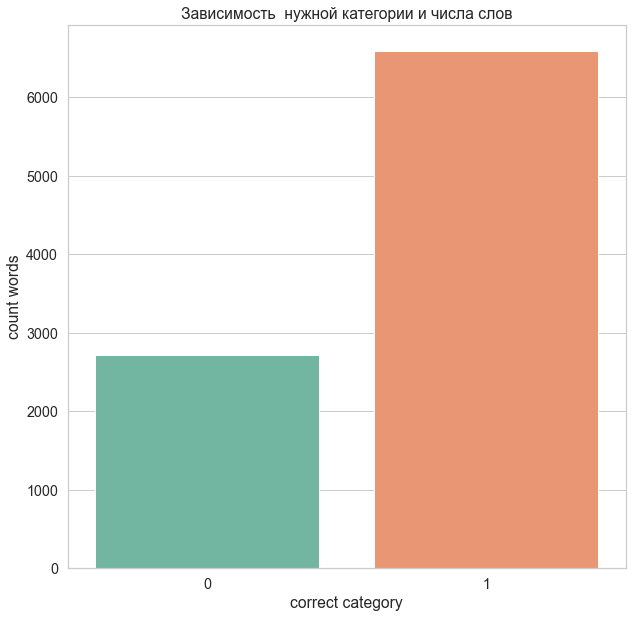

In [43]:
tmp_df = wiki_df[['count words', 'correct category']]
table_mean = tmp_df.groupby(by='correct category', as_index=False).mean()
plt.figure(figsize=(10,10))
plt.title("Зависимость  нужной категории и числа слов")
sns.barplot(data=table_mean, x='correct category', y='count words')

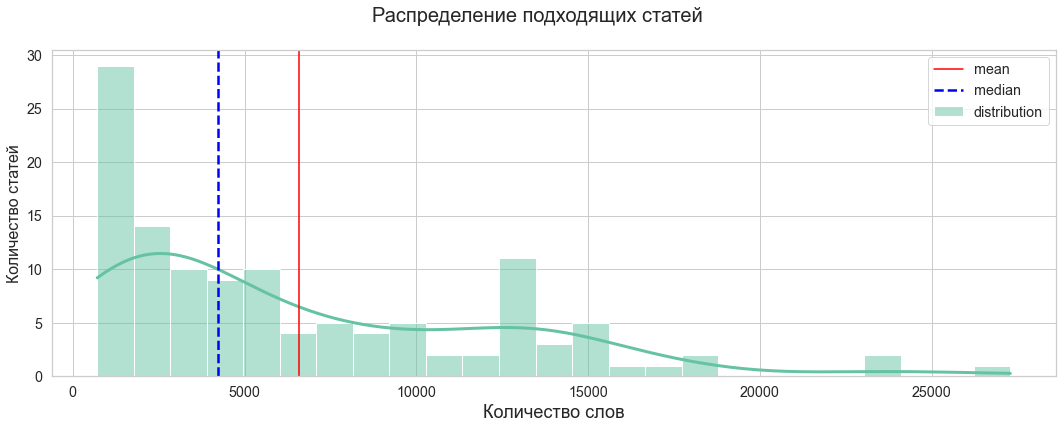

In [44]:
tmp_df = wiki_df[['count words', 'correct category']]
tmp_df = tmp_df[tmp_df['correct category'] == 1]
#table_mean = tmp_df.groupby(by='correct category', as_index=False).mean()
plt.figure(figsize=(18,6))
h = sns.histplot(data=tmp_df,
                x='count words',
                 bins=25,
                kde=True,
                line_kws={"linewidth":3},
                label='distribution')
fig = h.get_figure()
fig.suptitle('Распределение подходящих статей', fontsize=20)
plt.xlabel('Количество слов', fontsize=18)
plt.ylabel('Количество статей', fontsize=16)
plt.axvline(x=tmp_df['count words'].mean(),
            color='red',
           label='mean')
plt.axvline(x=tmp_df['count words'].median(),
            color='blue',
            ls='--', 
            lw=2.5,
           label='median')
plt.legend()

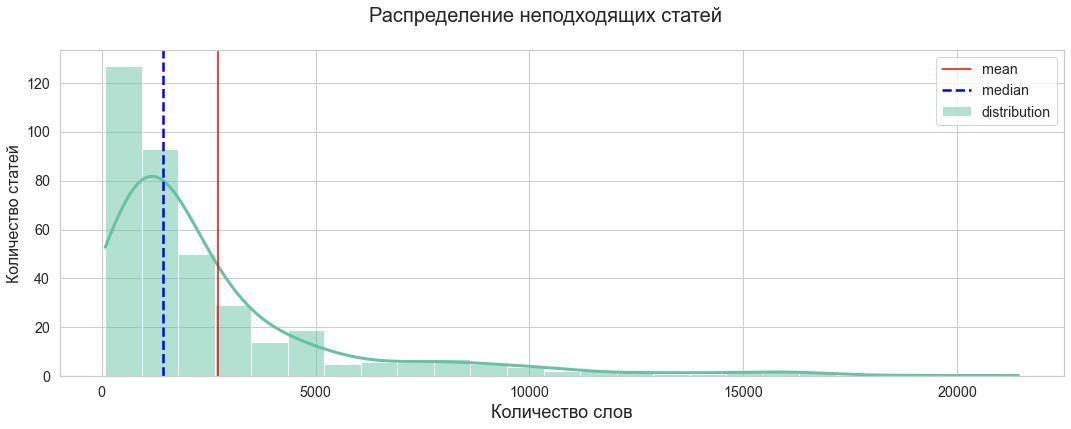

In [45]:
tmp_df = wiki_df[['count words', 'correct category']]
tmp_df = tmp_df[tmp_df['correct category'] == 0]
#table_mean = tmp_df.groupby(by='correct category', as_index=False).mean()
plt.figure(figsize=(18,6))
h = sns.histplot(data=tmp_df,
                x='count words',
                 bins=25,
                kde=True,
                line_kws={"linewidth":3},
                label='distribution')
fig = h.get_figure()
fig.suptitle('Распределение неподходящих статей', fontsize=20)
plt.xlabel('Количество слов', fontsize=18)
plt.ylabel('Количество статей', fontsize=16)
plt.axvline(x=tmp_df['count words'].mean(),
            color='red',
           label='mean')
plt.axvline(x=tmp_df['count words'].median(),
            color='blue',
            ls='--', 
            lw=2.5,
           label='median')
plt.legend()


Посчитаем дисперсии распределений

In [46]:
tmp_df = wiki_df[['count words', 'correct category']]
tmp_df = tmp_df[tmp_df['correct category'] == 1]
tmp_df.var()

count words         3.259646e+07
correct category    0.000000e+00
dtype: float64

In [47]:
tmp_df = wiki_df[['count words', 'correct category']]
tmp_df = tmp_df[tmp_df['correct category'] == 0]
tmp_df.var()

count words         1.070664e+07
correct category    0.000000e+00
dtype: float64

Постройте boxplot-графики для того, чтобы сравнить эти 2 распределения. Какой способ сравнения кажется вам более удобным?

<AxesSubplot:xlabel='correct category', ylabel='count words'>

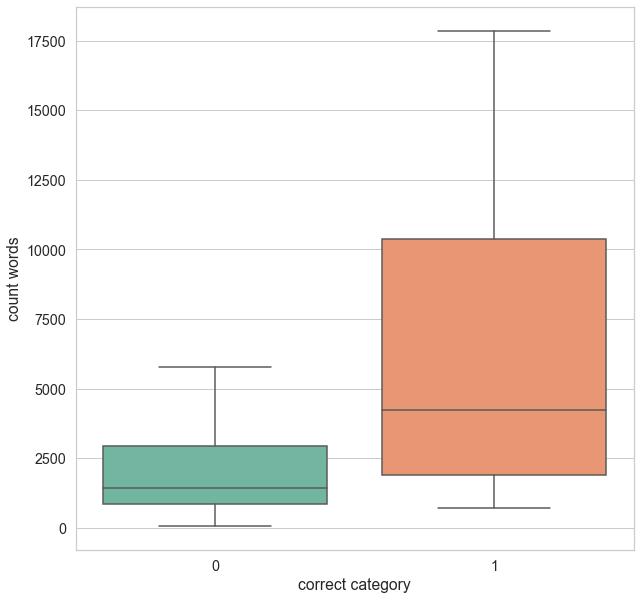

In [48]:
tmp_df = wiki_df[['count words', 'correct category']]
plt.figure(figsize=(10,10))
sns.boxplot(x = "correct category",
            y = "count words",
           data = tmp_df,
           showfliers=False)

**3.** Визуализируйте скачанные страницы сайта. В качестве значений по осям возьмите количество слов на странице и количество ссылок на ней. Цветом обозначьте принадлежность выбранной вами категории. 

In [49]:
wiki_df

,text,title,url,count words,correct category
0,"Sport - Wikipedia\nSport\nFrom Wikipedia, the ...",Sport - Wikipedia,https://en.wikipedia.org/wiki/Sport,6663,0
1,Association football - Wikipedia\nAssociation ...,Association football - Wikipedia,https://en.wikipedia.org/wiki/Association_foot...,12925,1
2,Indoor American football - Wikipedia\nIndoor A...,Indoor American football - Wikipedia,https://en.wikipedia.org/wiki/Arena_football,5792,0
3,National Football League - Wikipedia\nNational...,National Football League - Wikipedia,https://en.wikipedia.org/wiki/National_Footbal...,15591,0
4,Gaelic football - Wikipedia\nGaelic football\n...,Gaelic football - Wikipedia,https://en.wikipedia.org/wiki/Gaelic_football,9270,0
...,...,...,...,...,...
496,Professional Football League of America - Wiki...,Professional Football League of America - Wiki...,https://en.wikipedia.org/wiki/Professional_Foo...,1460,0
497,Texas Football League - Wikipedia\nTexas Footb...,Texas Football League - Wikipedia,https://en.wikipedia.org/wiki/Texas_Football_L...,2433,0
498,Seaboard Football League - Wikipedia\nSeaboard...,Seaboard Football League - Wikipedia,https://en.wikipedia.org/wiki/Seaboard_Footbal...,1550,0
499,American Football Association (1977–1983) - Wi...,American Football Association (1977–1983) - Wi...,https://en.wikipedia.org/wiki/American_Footbal...,3248,0


In [50]:
def extract_links_from_html(url, html):
    '''Парсит ссылки на странице

    Принимает:
        url (str) - исходный урл страницы
        html (str) - содержание html-страницы

    Возвращает:
        list - список ссылок, находящихся на странице
    '''
    parser = BeautifulSoup(html)
    # Формируем ссылки на те страницы, на которые ссылается документ
    return [urljoin(url, link.get('href')) for link in parser.findAll('a')]


In [51]:
def count_urls(x):
    main_url = x['url']
    html = download_from_the_internet(main_url)
    x['count urls'] = len(extract_links_from_html(main_url, html))
    return x

In [52]:
wiki_df['count urls'] = 0
wiki_df = wiki_df.apply(lambda x : count_urls(x), axis=1)
wiki_df

,text,title,url,count words,correct category,count urls
0,"Sport - Wikipedia\nSport\nFrom Wikipedia, the ...",Sport - Wikipedia,https://en.wikipedia.org/wiki/Sport,6663,0,1065
1,Association football - Wikipedia\nAssociation ...,Association football - Wikipedia,https://en.wikipedia.org/wiki/Association_foot...,12925,1,2298
2,Indoor American football - Wikipedia\nIndoor A...,Indoor American football - Wikipedia,https://en.wikipedia.org/wiki/Arena_football,5792,0,983
3,National Football League - Wikipedia\nNational...,National Football League - Wikipedia,https://en.wikipedia.org/wiki/National_Footbal...,15591,0,2221
4,Gaelic football - Wikipedia\nGaelic football\n...,Gaelic football - Wikipedia,https://en.wikipedia.org/wiki/Gaelic_football,9270,0,1180
...,...,...,...,...,...,...
496,Professional Football League of America - Wiki...,Professional Football League of America - Wiki...,https://en.wikipedia.org/wiki/Professional_Foo...,1460,0,254
497,Texas Football League - Wikipedia\nTexas Footb...,Texas Football League - Wikipedia,https://en.wikipedia.org/wiki/Texas_Football_L...,2433,0,265
498,Seaboard Football League - Wikipedia\nSeaboard...,Seaboard Football League - Wikipedia,https://en.wikipedia.org/wiki/Seaboard_Footbal...,1550,0,248
499,American Football Association (1977–1983) - Wi...,American Football Association (1977–1983) - Wi...,https://en.wikipedia.org/wiki/American_Footbal...,3248,0,359


Text(0, 0.5, 'Количество ссылок')

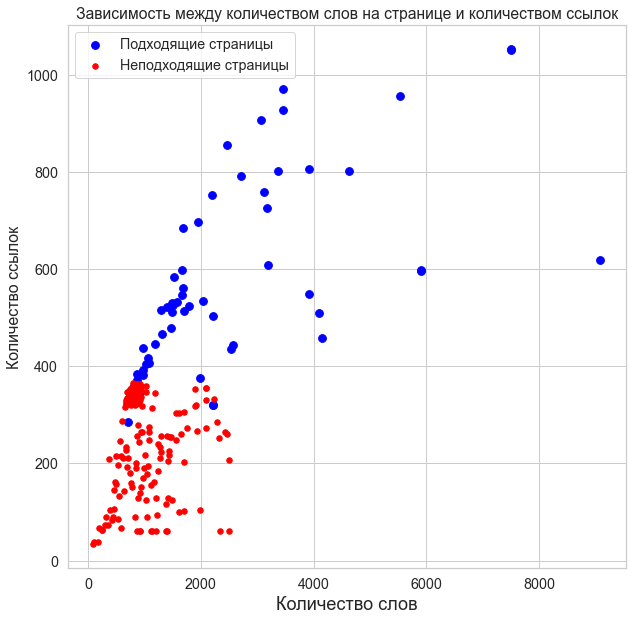

In [53]:

data_correct_category = wiki_df[wiki_df['correct category'] == 1]
data_incorrect_category = wiki_df[wiki_df['correct category'] == 0]

q = data_correct_category['count words'].quantile(0.7)
data_correct_category = data_correct_category[data_correct_category['count words'] < q]

q = data_correct_category['count urls'].quantile(0.7)
data_correct_category = data_correct_category[data_correct_category['count urls'] < q]

q = data_incorrect_category['count words'].quantile(0.7)
data_incorrect_category = data_incorrect_category[data_incorrect_category['count words'] < q]

q = data_incorrect_category['count urls'].quantile(0.7)
data_incorrect_category = data_incorrect_category[data_incorrect_category['count urls'] < q]



plt.figure(figsize=(10, 10))
plt.scatter(data_correct_category['count words'], data_correct_category['count urls'], s=60, c='b', label='Подходящие страницы')
plt.scatter(data_incorrect_category['count words'], data_incorrect_category['count urls'], s=30, c='r', label='Неподходящие страницы') 
plt.legend()

plt.title('Зависимость между количеством слов на странице и количеством ссылок')
plt.xlabel('Количество слов', fontsize=18)
plt.ylabel('Количество ссылок', fontsize=16)

Видим, что подходящие страницы имеют бОльшее число слов и на них расположено бОльшее число ссылок

**4.** Предложите функцию фильтрации web-страниц, которую нужно подать в `load_web_pages`, чтобы среди скачанных сайтов был больше процент страниц из выбранной вами категории.

In [54]:
data_correct_category['url']

5             https://en.wikipedia.org/wiki/Football_War
6      https://en.wikipedia.org/wiki/Major_achievemen...
11     https://en.wikipedia.org/wiki/Ball_(associatio...
17     https://en.wikipedia.org/wiki/Goalkeeper_(asso...
22     https://en.wikipedia.org/wiki/Names_for_associ...
30     https://en.wikipedia.org/wiki/Rugby_Football_U...
37     https://en.wikipedia.org/wiki/Scottish_Footbal...
38     https://en.wikipedia.org/wiki/Football_Associa...
39     https://en.wikipedia.org/wiki/Irish_Football_A...
53     https://en.wikipedia.org/wiki/Association_foot...
54     https://en.wikipedia.org/wiki/Striker_(associa...
58     https://en.wikipedia.org/wiki/Substitute_(asso...
60     https://en.wikipedia.org/wiki/Goalkeeper_(foot...
86     https://en.wikipedia.org/wiki/Domestic_associa...
88     https://en.wikipedia.org/wiki/Portal:Women's_a...
103       https://en.wikipedia.org/wiki/Amputee_football
104    https://en.wikipedia.org/wiki/Five-a-side_foot...
105     https://en.wikipedia.or

Нужно внимательно посмотреть на полученные данные и понять, от чего зависит - подходит ли конкретный url под категорию, в идеале, нужно распарсить каждый url по словам и понять, какие слова и/или фразы входят в него чаще всего<br>
Но я уже вижу, что достаточно большое кол-во подходящих url имеет год в своей записи или слово ***ассоциация*** на английском, это и будет доп параметром фильтрации - попробовал так сделать, процент не увеличился.
Поэтому будем делать так, фильтруем страниы только со словом russia в заголовке или тексте статьи и если есть, то добавляем в обход. Однако, есть страницы, на которых нет таких слов и мы еще нашли менее 500 страниц, чтобы не было таких случаев, добавим в обход также страницы с большим кол-вом ссылок(>400), тк на графике именно такие страницы чаще всего подходящие

In [55]:
for site in data_correct_category['url']:
    print(site.split('/'))

['https:', '', 'en.wikipedia.org', 'wiki', 'Football_War']
['https:', '', 'en.wikipedia.org', 'wiki', 'Major_achievements_in_association_football_by_nation']
['https:', '', 'en.wikipedia.org', 'wiki', 'Ball_(association_football)']
['https:', '', 'en.wikipedia.org', 'wiki', 'Goalkeeper_(association_football)']
['https:', '', 'en.wikipedia.org', 'wiki', 'Names_for_association_football']
['https:', '', 'en.wikipedia.org', 'wiki', 'Rugby_Football_Union']
['https:', '', 'en.wikipedia.org', 'wiki', 'Scottish_Football_Association']
['https:', '', 'en.wikipedia.org', 'wiki', 'Football_Association_of_Wales']
['https:', '', 'en.wikipedia.org', 'wiki', 'Irish_Football_Association']
['https:', '', 'en.wikipedia.org', 'wiki', 'Association_football_positions']
['https:', '', 'en.wikipedia.org', 'wiki', 'Striker_(association_football)']
['https:', '', 'en.wikipedia.org', 'wiki', 'Substitute_(association_football)']
['https:', '', 'en.wikipedia.org', 'wiki', 'Goalkeeper_(football)']
['https:', '', 'e

У меня очень долго работала новая функция фильтрации, я пробовал добавить декораторы, ограничивающие время работы функии, но результатов это, к сожалению, не принесло, тк крашилось ядро.

In [57]:
import signal
import time
import re

def time_break(func):
    """
    Декоратор, останавливающий работу декорируемой функции, если её
    выполнение, заняло более 10 секунд
    """

    def wrapper(*args, **kwargs):
        try:
            #print ("Запускаем тестируемую функцию") 
            signal.alarm(10)
            res = func(*args, **kwargs)
            signal.alarm(0)
            #print ("Нормальное завершение")
            return res
        except Exception as e:
            #print(e)
            return None

    return wrapper

In [58]:
#@time_break
def new_filtration_function(url):
    if 'en.wikipedia.org' not in url:
        return False
    if '#' in url:
        return False
    years_arr = []
    if 'football' in url.lower():
        if 'russia' in url.lower():
          return True
        main_url = url
        #print('go download', url)
        #print(time.time())
        html = download_from_the_internet(main_url)
        #print('finish download')
        #print(time.time())
        if html is None:
            return False
        text = extract_text_info_from_html(html)
        if 'russia' in text['text'].lower() or 'russia' in text['title'].lower():
            return True
        if len(extract_links_from_html(main_url, html)) > 400:
            return True
    return False

In [59]:
def load_web_pages(seed, max_downloads, filtration_function, start_time):
    '''Обходит web-страницы в ширину и загружает информацию о них.
    
    Принимает:
        seed (str) -- страница, с которой начинать обход.
        max_downloads (int) -- максимальное число загруженных страниц.
        filtration_function (str -> bool) -- функция, указывающая, 
            стоит ли загружать страницу. Пример: is_wiki_article.
            
    Возвращает:
        pages_json (list) - список словарей с информацией о страницах.
    '''
    
    # Создаём список со страницами
    pages_json = []
    
    # Создаём очередь для обхода в ширину
    q = Queue()
    q.put([seed, 0])

    already_visited = set()
    n_downloads = 0
    time_start = time.time()
    
    last_time = time.time()
    while not q.empty():
        
        getted = q.get()
        getted_url = getted[0]
        getted_depth = getted[1]
        
        # Нормализуем урл
        main_url = url_normalize(getted_url)
        
        if main_url.lower() in already_visited:
            continue
        print("--- %s seconds ---" % (time.time() - start_time))
        print(len(already_visited))
        print(main_url)
        already_visited.add(main_url.lower())
        html = download_from_the_internet(main_url)
        if html is None:
            continue
        # Извлекаем ссылки из страницы
        children_links = extract_links_from_html(main_url, html)
        time.sleep(1)

        # Извлекаем текст страницы
        text_info = extract_text_info_from_html(html) 

        # Добавляем запись в таблицу
        text_info['url'] = main_url
        text_info['depth'] = getted_depth
        text_info['time'] = time.time() - last_time
        last_time = time.time()
        pages_json.append(text_info)

        n_downloads += 1
        if n_downloads > max_downloads:
            break

        # Добавляем ещё не посещённые ссылки в очередь
        new_children_links = []
        for child in children_links:
            if 'russia' in child.lower():
                new_children_links.append(child)
        if len(new_children_links) > 0:
            children_links = new_children_links
        
        for child in children_links:
            if q.qsize() > 500:
                break
            if url_normalize(child) not in already_visited \
            and filtration_function(child):
                q.put([child, getted_depth + 1])
                
    return pages_json

Скачайте снова не менее $500$ страниц, но уже с новой функцией фильтрации. Добавьте следующую информацию к каждой странице:

* глубина в обходе,
* время скачивания страницы.

Для замера времени можете воспользоваться функцией `time` из пакета `time`.

In [60]:
start_time = time.time()
load_data = load_web_pages('https://en.wikipedia.org/wiki/Sport', 500, new_filtration_function, start_time)

--- 0.008398056030273438 seconds ---
0
https://en.wikipedia.org/wiki/Sport
--- 10.419183254241943 seconds ---
1
https://en.wikipedia.org/wiki/Association_football
--- 733.7612471580505 seconds ---
2
https://en.wikipedia.org/wiki/Arena_football
--- 991.7080898284912 seconds ---
3
https://en.wikipedia.org/wiki/National_Football_League
--- 994.9677581787109 seconds ---
4
https://en.wikipedia.org/wiki/Gaelic_football
--- 999.8631291389465 seconds ---
5
https://en.wikipedia.org/wiki/Football_War
--- 1001.4299411773682 seconds ---
6
https://en.wikipedia.org/wiki/Major_achievements_in_association_football_by_nation
--- 1003.3892691135406 seconds ---
7
https://en.wikipedia.org/wiki/Football
--- 1010.1018829345703 seconds ---
8
https://en.wikipedia.org/wiki/History_of_association_football
--- 1011.7530510425568 seconds ---
9
https://en.wikipedia.org/wiki/Ball_(association_football)
--- 1013.3609511852264 seconds ---
10
https://en.wikipedia.org/wiki/Glossary_of_association_football_terms
--- 111

--- 1460.0401010513306 seconds ---
85
https://en.wikipedia.org/wiki/Football_hooliganism
--- 1462.1474289894104 seconds ---
86
https://en.wikipedia.org/wiki/Football_chant
--- 1463.9041969776154 seconds ---
87
https://en.wikipedia.org/wiki/Football_at_the_Youth_Olympic_Games
--- 1465.458694934845 seconds ---
88
https://en.wikipedia.org/wiki/List_of_association_football_families
--- 1468.466381072998 seconds ---
89
https://en.wikipedia.org/wiki/Lists_of_association_football_players
--- 1469.8519580364227 seconds ---
90
https://en.wikipedia.org/wiki/List_of_footballers_with_500_or_more_goals
--- 1484.187241077423 seconds ---
91
https://en.wikipedia.org/wiki/List_of_men's_national_association_football_teams
--- 1486.5885891914368 seconds ---
92
https://en.wikipedia.org/wiki/List_of_women's_national_association_football_teams
--- 1488.4978289604187 seconds ---
93
https://en.wikipedia.org/wiki/12th_man_(football)
--- 1493.2224221229553 seconds ---
94
https://en.wikipedia.org/wiki/Associatio

--- 2097.2660732269287 seconds ---
165
https://en.wikipedia.org/wiki/1980_in_association_football
--- 2099.2890372276306 seconds ---
166
https://en.wikipedia.org/wiki/1981_in_association_football
--- 2102.3588240146637 seconds ---
167
https://en.wikipedia.org/wiki/1982_in_association_football
--- 2104.540261030197 seconds ---
168
https://en.wikipedia.org/wiki/1983_in_association_football
--- 2106.653123140335 seconds ---
169
https://en.wikipedia.org/wiki/1984_in_association_football
--- 2108.712047100067 seconds ---
170
https://en.wikipedia.org/wiki/1985_in_association_football
--- 2110.777669906616 seconds ---
171
https://en.wikipedia.org/wiki/1986_in_association_football
--- 2112.83163022995 seconds ---
172
https://en.wikipedia.org/wiki/1987_in_association_football
--- 2114.886125087738 seconds ---
173
https://en.wikipedia.org/wiki/1988_in_association_football
--- 2116.9689769744873 seconds ---
174
https://en.wikipedia.org/wiki/1989_in_association_football
--- 2119.190361261368 secon

--- 2566.387612104416 seconds ---
251
https://en.wikipedia.org/wiki/Template_talk:Professional_gridiron_football_leagues_in_North_America
--- 2568.9352571964264 seconds ---
252
https://en.wikipedia.org/wiki/List_of_American_and_Canadian_football_leagues
--- 2570.6123480796814 seconds ---
253
https://en.wikipedia.org/wiki/Minor_league_football_(gridiron)
--- 2575.2327711582184 seconds ---
254
https://en.wikipedia.org/wiki/United_States_Football_League_(2022)
--- 2577.2645070552826 seconds ---
255
https://en.wikipedia.org/wiki/American_Football_League_(1926)
--- 2579.256047964096 seconds ---
256
https://en.wikipedia.org/wiki/All-America_Football_Conference
--- 2581.6369030475616 seconds ---
257
https://en.wikipedia.org/wiki/American_Football_League
--- 2584.336634874344 seconds ---
258
https://en.wikipedia.org/wiki/Continental_Football_League
--- 2586.409986257553 seconds ---
259
https://en.wikipedia.org/wiki/World_Football_League
--- 2588.6230421066284 seconds ---
260
https://en.wikiped

--- 3295.347259044647 seconds ---
331
https://en.wikipedia.org/wiki/Burkina_Faso_national_football_team
--- 3297.3722360134125 seconds ---
332
https://en.wikipedia.org/wiki/Burundi_national_football_team
--- 3299.283480167389 seconds ---
333
https://en.wikipedia.org/wiki/Cameroon_national_football_team
--- 3302.9228711128235 seconds ---
334
https://en.wikipedia.org/wiki/Cameroon_women's_national_football_team
--- 3305.551022052765 seconds ---
335
https://en.wikipedia.org/wiki/Cape_Verde_national_football_team
--- 3308.4208130836487 seconds ---
336
https://en.wikipedia.org/wiki/Central_African_Republic_national_football_team
--- 3310.217075109482 seconds ---
337
https://en.wikipedia.org/wiki/Chad_national_football_team
--- 3311.951895236969 seconds ---
338
https://en.wikipedia.org/wiki/List_of_years_in_association_football
--- 3313.6615471839905 seconds ---
339
https://en.wikipedia.org/wiki/Category:Association_football_by_year
--- 3646.1606302261353 seconds ---
340
https://en.wikipedia

--- 4559.350860118866 seconds ---
407
https://en.wikipedia.org/w/index.php?action=edit&section=6&title=List_of_football_clubs_in_Russia
--- 4561.112998962402 seconds ---
408
https://en.wikipedia.org/w/index.php?action=edit&section=7&title=List_of_football_clubs_in_Russia
--- 4562.923509120941 seconds ---
409
https://en.wikipedia.org/w/index.php?action=edit&section=8&title=List_of_football_clubs_in_Russia
--- 4564.762171983719 seconds ---
410
https://en.wikipedia.org/w/index.php?action=edit&section=9&title=List_of_football_clubs_in_Russia
--- 4566.5227789878845 seconds ---
411
https://en.wikipedia.org/wiki/File:Russia_national_football_team_crest.svg
--- 4568.289937019348 seconds ---
412
https://en.wikipedia.org/wiki/Russian_national_football_team
--- 4570.798679113388 seconds ---
413
https://en.wikipedia.org/wiki/Russian_Football_Premier_League
--- 4573.492792129517 seconds ---
414
https://en.wikipedia.org/w/index.php?action=edit&section=1&title=Russian_Football_Union
--- 4575.23624396

--- 5057.876274108887 seconds ---
478
https://en.wikipedia.org/w/index.php?from=1880&title=Category:Association_football_by_year
--- 5061.758337020874 seconds ---
479
https://en.wikipedia.org/w/index.php?oldid=1014066949&title=Category:Association_football_by_year
--- 5067.516006946564 seconds ---
480
https://en.wikipedia.org/wiki/Special:RecentChangesLinked/Category:Association_football_by_year
--- 5074.538707017899 seconds ---
481
https://en.wikipedia.org/w/index.php?printable=yes&title=Category:Association_football_by_year
--- 5079.970703125 seconds ---
482
https://en.wikipedia.org/w/index.php?action=history&title=1929_in_association_football
--- 5089.424245119095 seconds ---
483
https://en.wikipedia.org/wiki/Special:RecentChangesLinked/1929_in_association_football
--- 5093.153527021408 seconds ---
484
https://en.wikipedia.org/w/index.php?action=history&title=1938_in_association_football
--- 5102.236384153366 seconds ---
485
https://en.wikipedia.org/wiki/Special:RecentChangesLinked/

Постройте гистограмму для времени скачивания страницы.

In [61]:
new_wiki_df = pd.DataFrame(load_data)
new_wiki_df

,text,title,url,depth,time
0,"Sport - Wikipedia\nSport\nFrom Wikipedia, the ...",Sport - Wikipedia,https://en.wikipedia.org/wiki/Sport,0,2.204986
1,Association football - Wikipedia\nAssociation ...,Association football - Wikipedia,https://en.wikipedia.org/wiki/Association_foot...,1,10.552508
2,Indoor American football - Wikipedia\nIndoor A...,Indoor American football - Wikipedia,https://en.wikipedia.org/wiki/Arena_football,1,722.618205
3,National Football League - Wikipedia\nNational...,National Football League - Wikipedia,https://en.wikipedia.org/wiki/National_Footbal...,1,258.525997
4,Gaelic football - Wikipedia\nGaelic football\n...,Gaelic football - Wikipedia,https://en.wikipedia.org/wiki/Gaelic_football,1,2.813042
...,...,...,...,...,...
496,England national football team - Wikipedia\nEn...,England national football team - Wikipedia,https://en.wikipedia.org/wiki/England_football...,4,2.722694
497,Yugoslavia national football team - Wikipedia\...,Yugoslavia national football team - Wikipedia,https://en.wikipedia.org/wiki/Yugoslavia_natio...,4,2.460221
498,UEFA Euro 1968 - Wikipedia\nUEFA Euro 1968\nFr...,UEFA Euro 1968 - Wikipedia,https://en.wikipedia.org/wiki/1968_European_Fo...,4,1.609080
499,DR Congo national football team - Wikipedia\nD...,DR Congo national football team - Wikipedia,https://en.wikipedia.org/wiki/DR_Congo_nationa...,4,2.925221


In [62]:
new_wiki_df['url'].unique()

array(['https://en.wikipedia.org/wiki/Sport',
       'https://en.wikipedia.org/wiki/Association_football',
       'https://en.wikipedia.org/wiki/Arena_football',
       'https://en.wikipedia.org/wiki/National_Football_League',
       'https://en.wikipedia.org/wiki/Gaelic_football',
       'https://en.wikipedia.org/wiki/Football_War',
       'https://en.wikipedia.org/wiki/Major_achievements_in_association_football_by_nation',
       'https://en.wikipedia.org/wiki/Football',
       'https://en.wikipedia.org/wiki/History_of_association_football',
       'https://en.wikipedia.org/wiki/Ball_(association_football)',
       'https://en.wikipedia.org/wiki/Glossary_of_association_football_terms',
       'https://en.wikipedia.org/wiki/Football_player',
       'https://en.wikipedia.org/wiki/Scoring_in_association_football',
       'https://en.wikipedia.org/wiki/Laws_of_the_Game_(association_football)',
       'https://en.wikipedia.org/wiki/Goalkeeper_(association_football)',
       'https://en.wi

In [63]:
def correct_category(x):
    '''years = []
    for i in range(2022, 2023):
        years.append(str(i))
    for year in years:
        if year in x['text']:
            x['correct category'] = 1
            return x'''
    
    if 'russia' in x['text'].lower():
        x['correct category'] = 1
    return x

In [64]:
new_wiki_df['correct category'] = 0
new_wiki_df = new_wiki_df.apply(lambda x : correct_category(x), axis=1)
len(new_wiki_df[new_wiki_df['correct category'] == 1]) / len(new_wiki_df)

0.47904191616766467

Видим, что процент страниц нужной категории увеличился в 2 раза, с 24 до 48

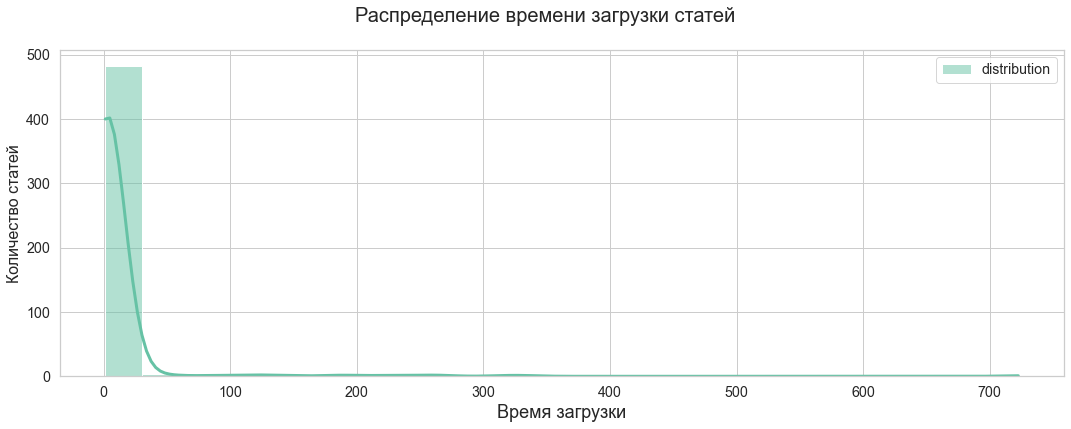

In [65]:
plt.figure(figsize=(18,6))
h = sns.histplot(data=new_wiki_df,
                x='time',
                 bins=25,
                kde=True,
                line_kws={"linewidth":3},
                label='distribution')
fig = h.get_figure()
fig.suptitle('Распределение времени загрузки статей', fontsize=20)
plt.xlabel('Время загрузки', fontsize=18)
plt.ylabel('Количество статей', fontsize=16)

plt.legend()

In [66]:
new_wiki_df['index'] = new_wiki_df.index.values
new_wiki_df

,text,title,url,depth,time,correct category,index
0,"Sport - Wikipedia\nSport\nFrom Wikipedia, the ...",Sport - Wikipedia,https://en.wikipedia.org/wiki/Sport,0,2.204986,0,0
1,Association football - Wikipedia\nAssociation ...,Association football - Wikipedia,https://en.wikipedia.org/wiki/Association_foot...,1,10.552508,1,1
2,Indoor American football - Wikipedia\nIndoor A...,Indoor American football - Wikipedia,https://en.wikipedia.org/wiki/Arena_football,1,722.618205,0,2
3,National Football League - Wikipedia\nNational...,National Football League - Wikipedia,https://en.wikipedia.org/wiki/National_Footbal...,1,258.525997,0,3
4,Gaelic football - Wikipedia\nGaelic football\n...,Gaelic football - Wikipedia,https://en.wikipedia.org/wiki/Gaelic_football,1,2.813042,0,4
...,...,...,...,...,...,...,...
496,England national football team - Wikipedia\nEn...,England national football team - Wikipedia,https://en.wikipedia.org/wiki/England_football...,4,2.722694,1,496
497,Yugoslavia national football team - Wikipedia\...,Yugoslavia national football team - Wikipedia,https://en.wikipedia.org/wiki/Yugoslavia_natio...,4,2.460221,1,497
498,UEFA Euro 1968 - Wikipedia\nUEFA Euro 1968\nFr...,UEFA Euro 1968 - Wikipedia,https://en.wikipedia.org/wiki/1968_European_Fo...,4,1.609080,0,498
499,DR Congo national football team - Wikipedia\nD...,DR Congo national football team - Wikipedia,https://en.wikipedia.org/wiki/DR_Congo_nationa...,4,2.925221,0,499


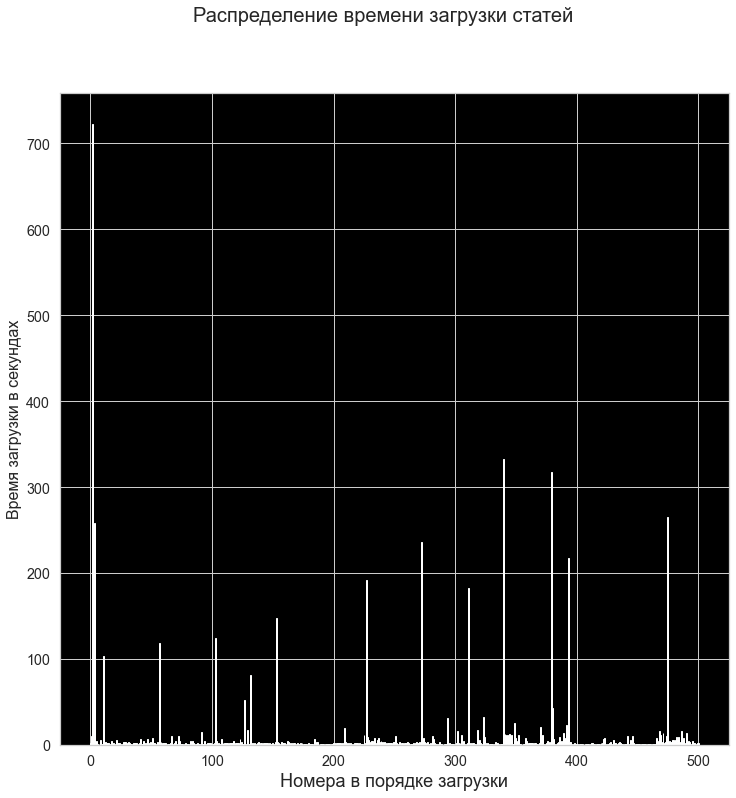

In [71]:
y = new_wiki_df['time']
x = new_wiki_df['index']

fig, ax = plt.subplots()

ax.bar(x, y)

ax.set_facecolor('black')
#fig.set_facecolor('red')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(12)    #  высота Figure

fig.suptitle('Распределение времени загрузки статей', fontsize=20)
plt.xlabel('Номера в порядке загрузки', fontsize=18)
plt.ylabel('Время загрузки в секундах', fontsize=16)
plt.show()

Text(0, 0.5, 'Плотность')

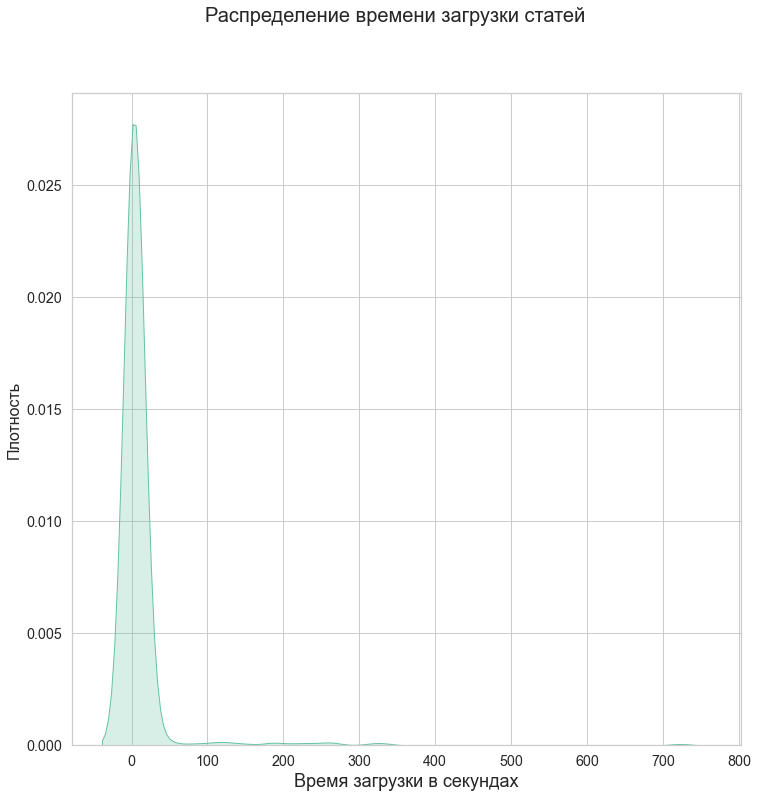

In [75]:
snsplot = sns.kdeplot(new_wiki_df['time'], shade=True)
fig = snsplot.get_figure()
fig.set_figwidth(12)    
fig.set_figheight(12)  

fig.suptitle('Распределение времени загрузки статей', fontsize=20)
plt.xlabel('Время загрузки в секундах', fontsize=18)
plt.ylabel('Плотность', fontsize=16)

Предположите, каким известным вам стандартным распределением оно может быть приближено? 

Это очень похоже на гамма-распределение

Построим график зависимости глубины и нужной нам категории

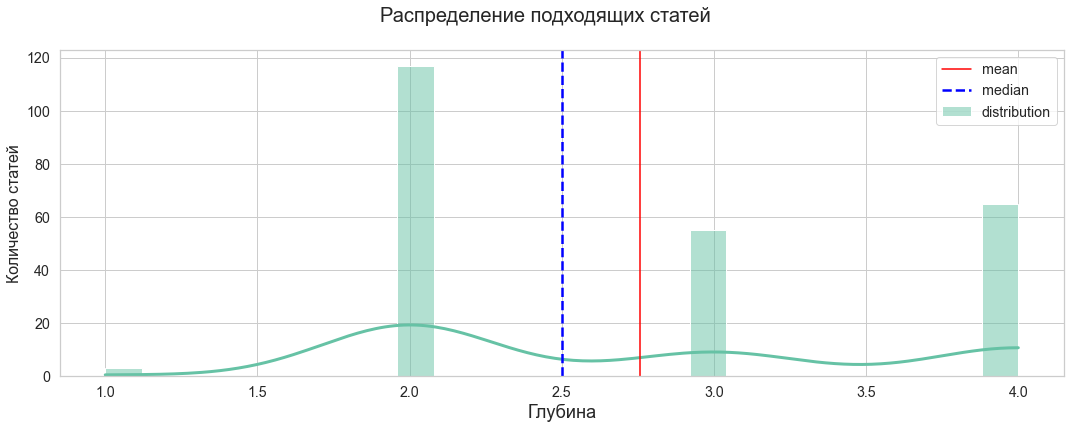

In [68]:
tmp_df = new_wiki_df[['depth', 'correct category']]
tmp_df = tmp_df[tmp_df['correct category'] == 1]
#table_mean = tmp_df.groupby(by='correct category', as_index=False).mean()
plt.figure(figsize=(18,6))
h = sns.histplot(data=tmp_df,
                x='depth',
                 bins=25,
                kde=True,
                line_kws={"linewidth":3},
                label='distribution')
fig = h.get_figure()
fig.suptitle('Распределение подходящих статей', fontsize=20)
plt.xlabel('Глубина', fontsize=18)
plt.ylabel('Количество статей', fontsize=16)
plt.axvline(x=tmp_df['depth'].mean(),
            color='red',
           label='mean')
plt.axvline(x=tmp_df['depth'].median(),
            color='blue',
            ls='--', 
            lw=2.5,
           label='median')
plt.legend()

**Выводы:** <...>

Можно сделать вывод, что выбранная мной категория футбола и подкатегория статей, содержащих `russia` в тексте, крайне не популярна, я пытался ограничится фильтрацией `url`, но это не помогло увеличить процент, в итоге только фильтрация по текстам статей помогла увеличить результат

От стартовой страницы, страницы нужной категории находятся достаточно далеко, в среднем на глубине более 2.5

По графику зависимости загрузки в секундах страниц и номеров страниц в порядке зарузки, можно сделать вывод, что всегда после длительного поиска какой-то страницы поиск нескольких следующих страниц происходит быстро